This is free hand experiment exploring what can be done with OpenCV. There is no particular goal other than exploring.

In [12]:
# pip install opencv-python

In [13]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

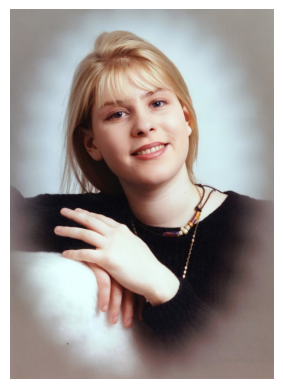

In [4]:
# Read the image
image = cv2.imread('images/RS.jpg')

# Convert the image from BGR to RGB (OpenCV reads images in BGR format by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

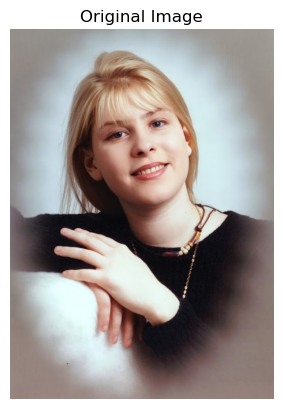

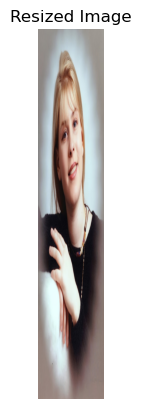

In [10]:
# Read the image
image = cv2.imread('images/RS.jpg')

# Display the original image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()

# Resize the image to half of its original size
resized_image = cv2.resize(image, None, fx=0.5, fy=2, interpolation=cv2.INTER_LINEAR)

# Display the resized image
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title('Resized Image')
plt.axis('off')
plt.show()

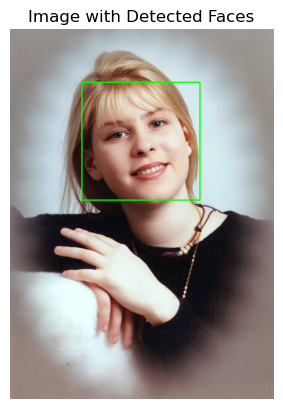

In [11]:
# Load the pre-trained Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Read the image
image = cv2.imread('images/RS.jpg')

# Convert the image to grayscale for face detection
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw rectangles around the detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Display the modified image with rectangles around the detected faces
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Image with Detected Faces')
plt.axis('off')
plt.show()

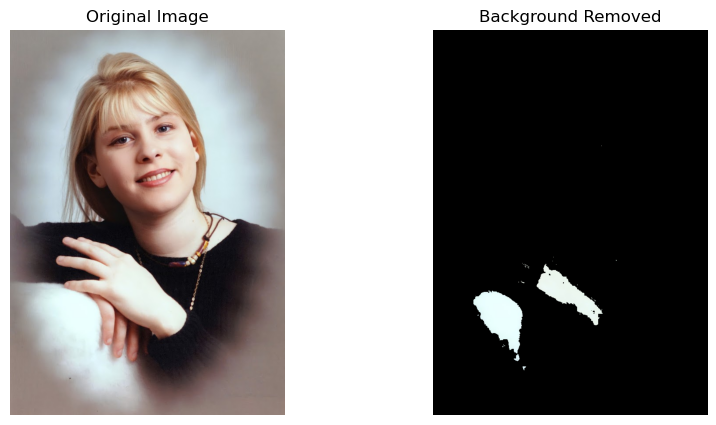

In [16]:
# Read the image
image = cv2.imread('images/RS.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create a binary mask of the background
_, mask = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)

# Invert the mask to represent the foreground
mask = cv2.bitwise_not(mask)

# Apply the mask to the original image to remove the background
result = cv2.bitwise_and(image, image, mask=mask)

# Display the original image and the result (background removed)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Background Removed')
plt.axis('off')

plt.show()

Not what I expected. But what do I want for a first exploration?

To improve the accuracy of background removal and prevent excessive removal of the foreground object, we can use more sophisticated techniques. One such approach is using the GrabCut algorithm, which iteratively refines a segmentation mask based on user-provided foreground and background seeds.

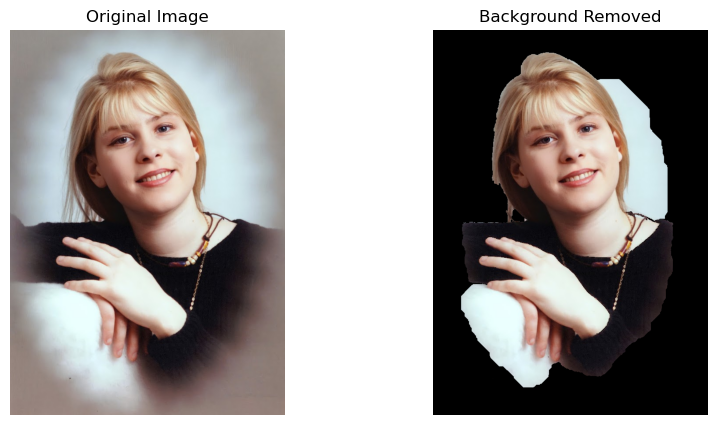

In [17]:
# Read the image
image = cv2.imread('images/RS.jpg')

# Create a binary mask initialized with zeros
mask = np.zeros(image.shape[:2], np.uint8)

# Define the background and foreground models
bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)

# Define a rectangle encompassing the foreground object
# (You may need to adjust the coordinates based on the specific image)
rect = (50, 50, image.shape[1] - 100, image.shape[0] - 100)

# Apply GrabCut algorithm to refine the mask
cv2.grabCut(image, mask, rect, bgd_model, fgd_model, iterCount=5, mode=cv2.GC_INIT_WITH_RECT)

# Modify the mask to differentiate between background and foreground
mask2 = np.where((mask == 2) | (mask == 0), 0, 255).astype('uint8')

# Apply the mask to the original image to remove the background
result = cv2.bitwise_and(image, image, mask=mask2)

# Display the original image and the result (background removed)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Background Removed')
plt.axis('off')

plt.show()


If this were a photoshop job, it would be very very bad. But consider we've accomplished this with code alone.

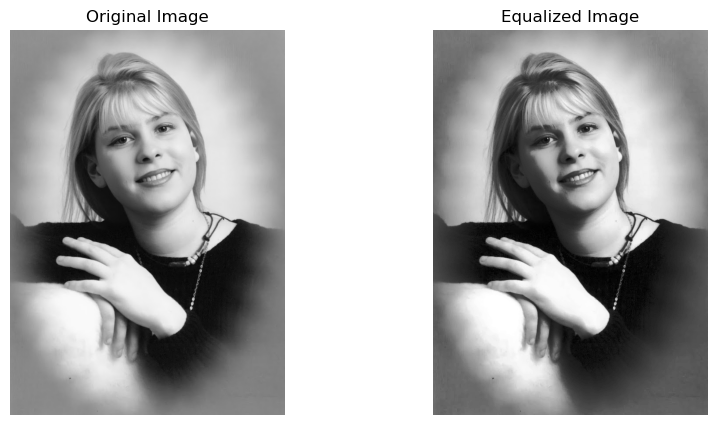

In [19]:
# Read the image
image = cv2.imread('images/RS.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply histogram equalization
equalized = cv2.equalizeHist(gray)

# Display the original and equalized images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB), cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.show()

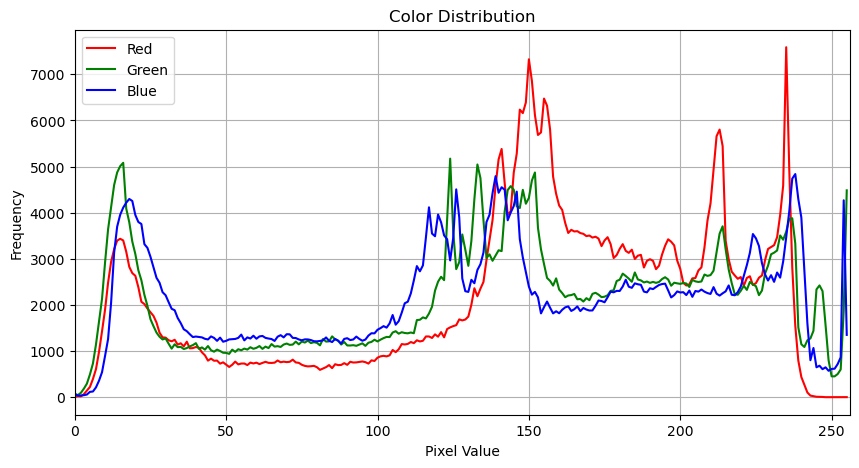

In [21]:
# Read the image
image = cv2.imread('images/RS.jpg')

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Split the image into its color channels
channels = cv2.split(image_rgb)

# Define colors for plotting
colors = ('r', 'g', 'b')

# Plot histograms for each color channel
plt.figure(figsize=(10, 5))
for channel, color in zip(channels, colors):
    hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

plt.title('Color Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend(['Red', 'Green', 'Blue'])
plt.grid(True)
plt.show()